<a href="https://colab.research.google.com/github/pabodaR/exploratory-data-analysis-netflix/blob/main/EDA_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratory Data Analysis with Netflix Dataset**

**1. Dataset Overview**

**Objective**: Get a general understanding of the dataset.

**Analysis:**

*   Dataset information
*   Handle missing values
*   Handle duplicates

**2. Content Type Distribution:**


**Objective:** Analyze the distribution of different types of content (movies vs. TV shows).

**Analysis**:

*   Count of movies and TV shows
*   Distribution of content type over    the years

**3. Top Countries by Content Production:**


**Objective**: Identify which countries produce the most content.

**Analysis**:

*  Top 10 countries by content production

**4. Director and Cast Analysis:**

**Objective**: Understand the most prolific directors and frequent collaborators.

**Analysis**:


*   Top directors by number of titles

*   Top actors with the most movies

**5. Genre of Content:**

**Objective:** Analyze genres of content.

**Analysis**:


*  Amount of content by genre

**6. Content Length Evolution:**


**Objective**: Investigate how the average length of movies has changed.

**Analysis**:

*   Average movie duration by release year



**Load dataset**

In [ ]:
import pandas as pd
#read dataset
df = pd.read_csv('/content/drive/MyDrive/portfolio/EDA/netflix_titles_nov_2019.csv')

#view dataset
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


**Dataset Overview**

Objective: Get a general understanding of the dataset.

Analysis:

*   Dataset information
*   Handle missing values
*   Handle duplicates



In [ ]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3447 entries, 2 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       3447 non-null   int64 
 1   title         3447 non-null   object
 2   director      3447 non-null   object
 3   cast          3447 non-null   object
 4   country       3447 non-null   object
 5   date_added    3447 non-null   object
 6   release_year  3447 non-null   int64 
 7   rating        3447 non-null   object
 8   duration      3447 non-null   object
 9   listed_in     3447 non-null   object
 10  description   3447 non-null   object
 11  type          3447 non-null   object
dtypes: int64(2), object(10)
memory usage: 350.1+ KB


In [ ]:
#check for missing values
df.isnull().sum()

show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64

In [ ]:
#handling missing values
#rows with missing values are removed since the dataset is still substantial after removing and they can't be filled due to introducing inaccuracies
# Remove rows with any missing values
df = df.dropna()

# Remove rows with missing values in specific columns
df = df.dropna(subset=['director', 'cast', 'country', 'date_added', 'rating'])


In [ ]:
#check for duplicate rows
duplicate_rows = df.duplicated()


0

**Content Type Distribution:**


**Objective:** Analyze the distribution of different types of content (movies vs. TV shows).

**Analysis**:

*   Count of movies and TV shows
*   Distribution of content type over    the years

**Conclusion**:

*   98.2% of the content are movies and the remaining 1.8% are TV shows

*   Movie releases have increased from 1990 to mid 2010s then it had dropped rapidly

*Distribution of content type over the years*

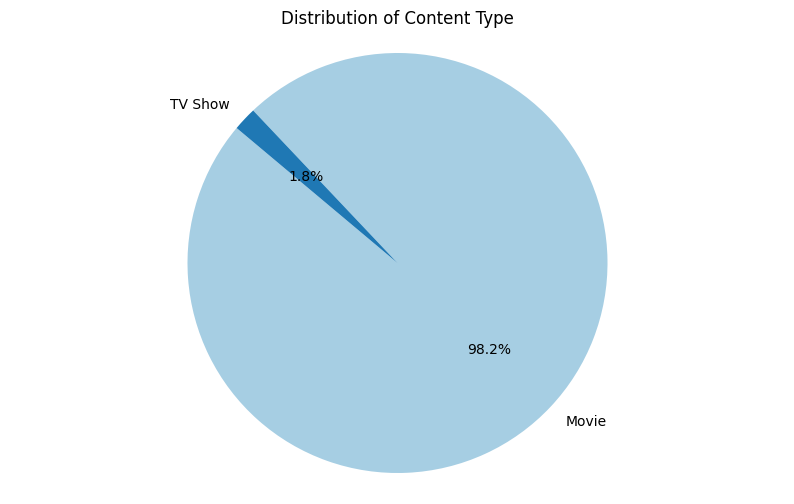

In [ ]:
#Count of movies and TV shows
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.pie(df['type'].value_counts(), labels=df['type'].value_counts().index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(df['type'].value_counts()))))
plt.title('Distribution of Content Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the Plot
plt.show()

*Distribution of content type over the years*

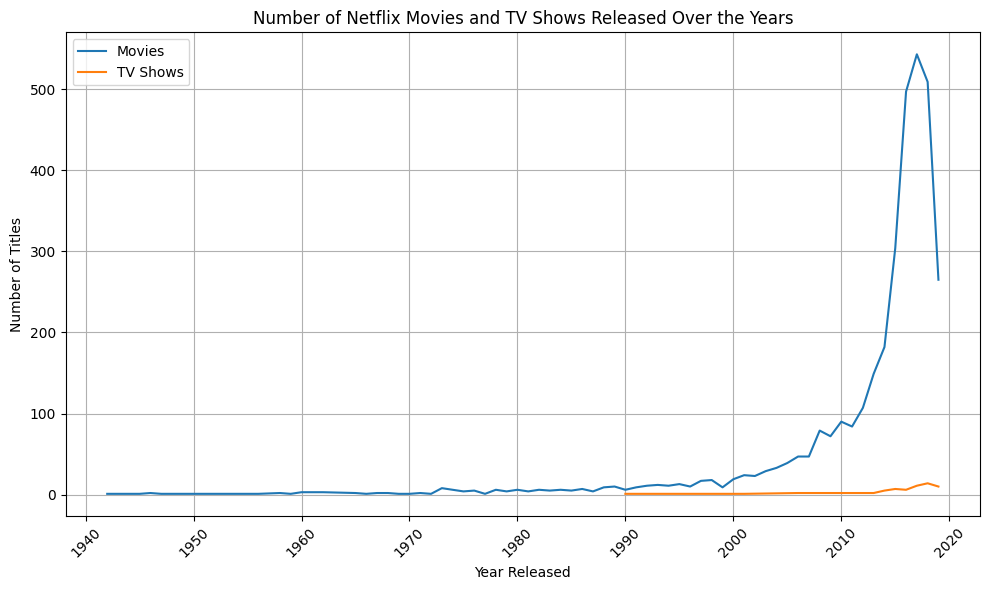

In [ ]:

#create separate movie and tv show datasets
movies= df[df['type'] =='Movie']
tv_shows= df[df['type']=='TV Show']

#count the no of movies and tv shows by year
movies_by_year = movies['release_year'].value_counts().sort_index()
tv_shows_by_year = tv_shows['release_year'].value_counts().sort_index()

#plot the results
plt.figure(figsize=(10, 6))
plt.plot(movies_by_year.index, movies_by_year.values, label='Movies')
plt.plot(tv_shows_by_year.index, tv_shows_by_year.values, label='TV Shows')
plt.title('Number of Netflix Movies and TV Shows Released Over the Years')
plt.xlabel('Year Released')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


**Top Countries by Content Production:**


**Objective**: Identify which countries produce the most content.

**Analysis**:

*  Top 10 countries by content production


**Conclusion**:


*   The United States of America have the highest amount of content in Netflix with India and the United Kingdom in 2nd and 3rd places respectively



*Count of content produced by each country*

In [ ]:
!pip install plotly


In [ ]:
import plotly.express as px
fig = px.bar(
    content_per_country,
    x=content_per_country.index,
    y=content_per_country.values,
    labels={'x': 'Country', 'y': 'Number of Content'},
    title='Countries vs Amount of Content'
)

fig.update_layout(
    xaxis={'categoryorder':'total descending'},
    width=1000,
    height=1000
)

fig.show()


*Top 10 countries by content production*

Text(0, 0.5, 'Number of Content')

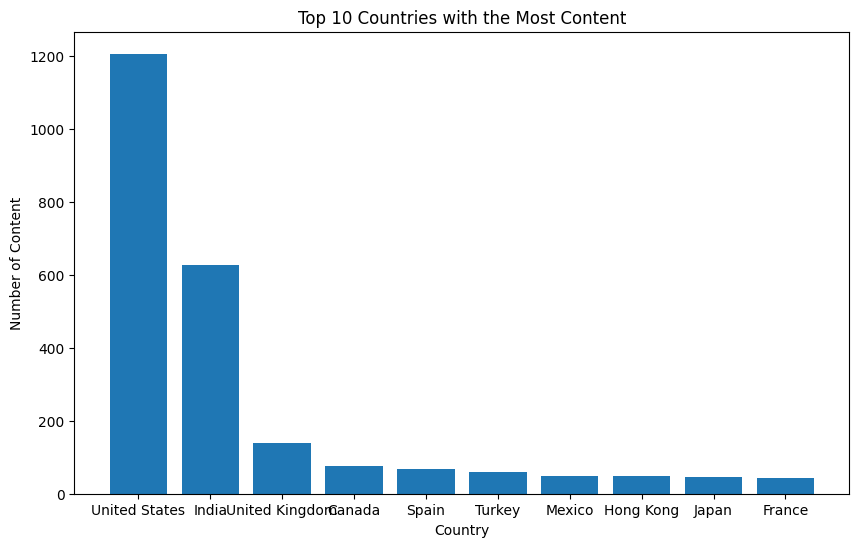

In [ ]:

content_per_country = df['country'].value_counts().sort_values(ascending=False).head(10)
content_per_country
plt.figure(figsize=(10, 6))
plt.bar(content_per_country.index, content_per_country.values)
plt.title('Top 10 Countries with the Most Content')
plt.xlabel('Country')
plt.ylabel('Number of Content')


**Director and Cast Analysis:**

**Objective**: Understand the most prolific directors and frequent collaborators.

**Analysis**:


*   Top directors by number of titles

*   Top actors with the most movies

**Conclusion:**


*   Raul Campos is the director who has directed the most no of movies
*   Anupham Kher is the actor in the most no of movies





*Top directors by number of titles*

Text(0, 0.5, 'Number of Titles')

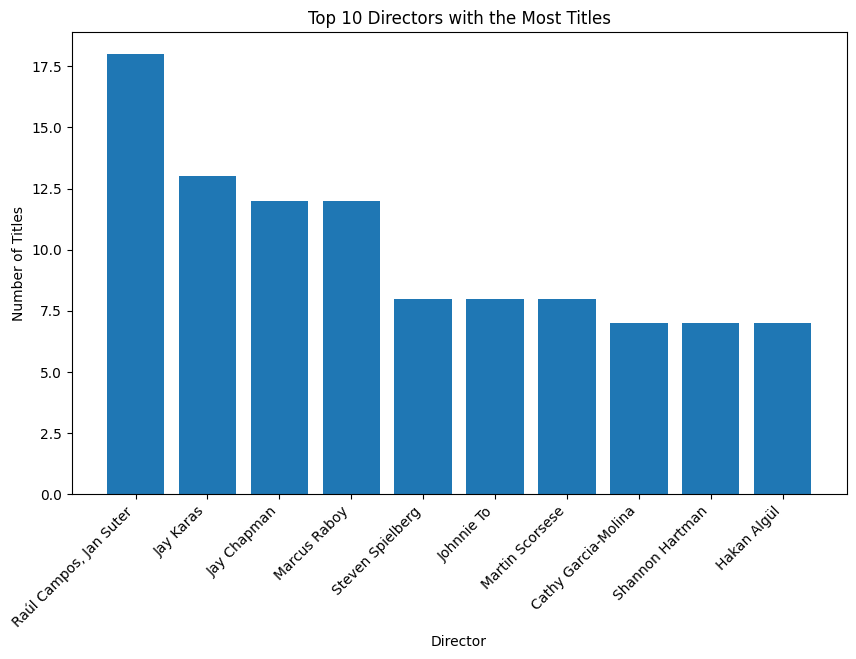

In [ ]:
titles_per_director = df['director'].value_counts().sort_values(ascending=False).head(10)
titles_per_director

plt.figure(figsize=(10, 6))
plt.bar(titles_per_director.index, titles_per_director.values)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Director')
plt.ylabel('Number of Titles')

*Top actors with the most movies*

Text(0.5, 1.0, 'Top 10 Actors with the Most Movies')

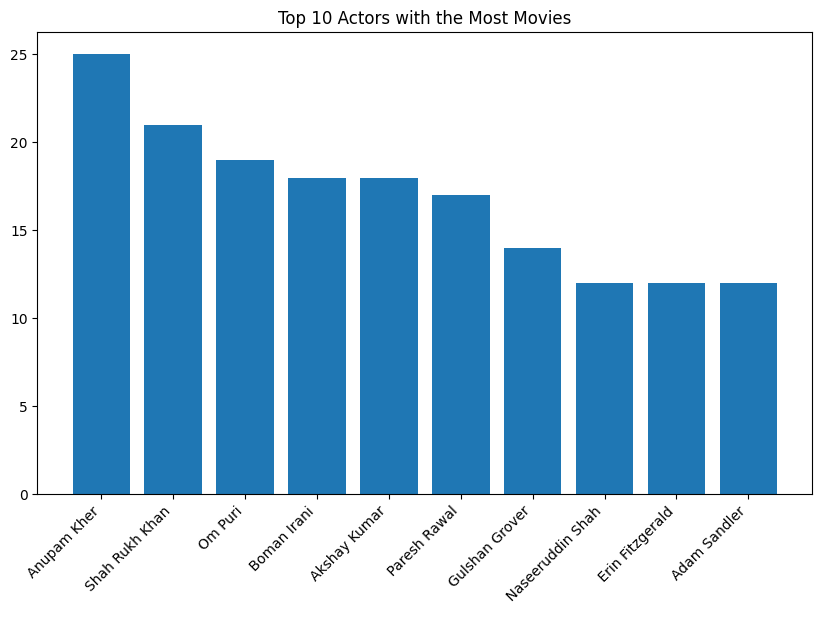

In [ ]:
#df['cast'] = df['cast'].apply(lambda x: x.split(','))
top_actors = df.explode('cast')['cast'].value_counts().head(10)
top_actors

plt.figure(figsize=(10, 6))
plt.bar(top_actors.index, top_actors.values)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Actors with the Most Movies')

**Genre of Content:**

**Objective:** Analyze genres of content.

**Analysis**:


*  Amount of content by genre

**Conclusion**: highest amount of content belong to 'international movies' genre with dramas and comedies following in 2nd and 3rd

Text(0, 0.5, 'Count')

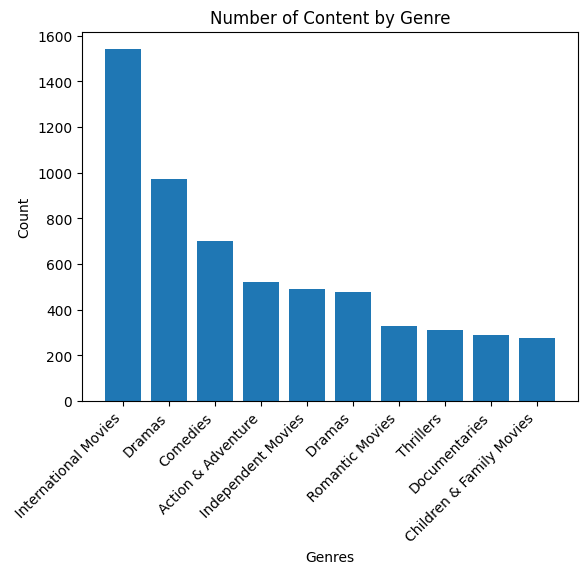

In [ ]:
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(','))
genres = df.explode('listed_in')['listed_in'].value_counts().head(10)
genres

plt.bar(genres.index, genres.values)
plt.xticks(rotation=45, ha='right')
plt.title('Number of Content by Genre')
plt.xlabel('Genres')
plt.ylabel('Count')

**Content Length Evolution:**


**Objective**: Investigate how the average length of movies has changed.

**Analysis**:

*   Average movie duration by release year

**Conclusion**: Average movie length has started at a value lower than 20 minutes and reached the peak of higher than 160 minutes in the 1960s.





*Average movie duration by release year*

<ipython-input-107-4f203299e036>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



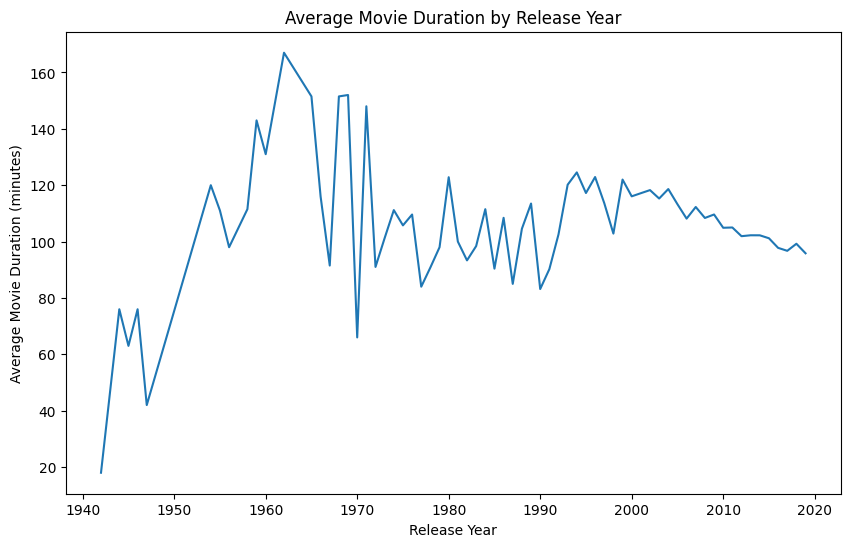

In [ ]:
#filer rows with movies
movies = df[df['type'] == 'Movie']

#check values in duration column
movies['duration'].unique()

#convert duration to int from string
movies['duration'] = movies['duration'].str.replace(' min', '').astype(int)

#calculate avg movie duration by year
avg_movie_duration_by_year = movies.groupby('release_year')['duration'].mean()

#plot results
plt.figure(figsize=(10, 6))
plt.plot(avg_movie_duration_by_year.index, avg_movie_duration_by_year.values)
plt.title('Average Movie Duration by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Movie Duration (minutes)')
plt.show()

